<a href="https://colab.research.google.com/github/AnIvanV/Libraries-Python-for-Data-Science-Numpy-Matplotlib-Scikit-learn/blob/main/DZ8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

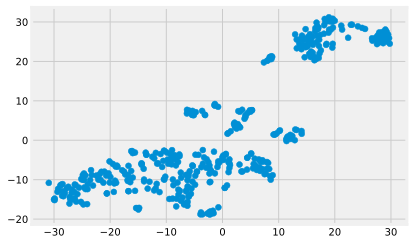

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2

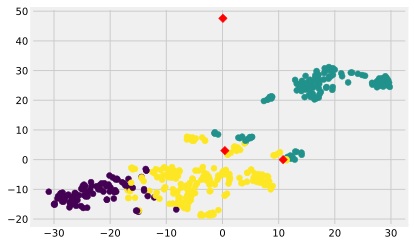

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1], c=labels_train)
centers = scaler.inverse_transform(kmeans.cluster_centers_) #Этого не было в задании, но смутило разбиение на кластеры в Задании3. Решила ввести для самопроверки. 
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.show()

In [ ]:
print('Средняя цена в кластере 0: {}'.format(y_train[labels_train == 0].mean()))
print('Средняя цена в кластере 1: {}'.format(y_train[labels_train == 1].mean()))
print('Средняя цена в кластере 2: {}'.format(y_train[labels_train == 2].mean()))

Средняя цена в кластере 0: 27.78837209302326
Средняя цена в кластере 1: 16.165354330708663
Средняя цена в кластере 2: 24.958115183246072


In [ ]:
print('Среднее значение CRIM в кластере 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Среднее значение CRIM в кластере 0: 0.07356558139534886
Среднее значение CRIM в кластере 1: 10.797028425196853
Среднее значение CRIM в кластере 2: 0.42166020942408367


*Задание 3

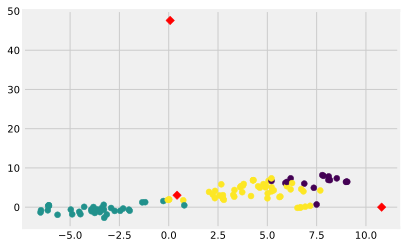

In [ ]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
test_labels = kmeans.predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.show()

In [ ]:
print('Средняя цена в кластере 0: {}'.format(y_test[test_labels == 0].mean()))
print('Средняя цена в кластере 1: {}'.format(y_test[test_labels == 1].mean()))
print('Средняя цена в кластере 2: {}'.format(y_test[test_labels == 2].mean()))

Средняя цена в кластере 0: 31.35
Средняя цена в кластере 1: 16.43714285714286
Средняя цена в кластере 2: 21.860784313725492


In [ ]:
print('Среднее значение CRIM в кластере 0: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 1: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 2: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean()))

Среднее значение CRIM в кластере 0: 0.062060000000000004
Среднее значение CRIM в кластере 1: 10.165531142857143
Среднее значение CRIM в кластере 2: 0.26607882352941176


Остального в задании не было. Просто решила проверить, что получилось

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

lr.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])
y_test_pred_0 = lr.predict(X_test_scaled.loc[test_labels == 0])
r2_score(y_test[test_labels == 0], y_test_pred_0)

0.9155161972050823

In [ ]:
lr.fit(X_train_scaled.loc[labels_train == 1], y_train[labels_train == 1])
y_test_pred_1 = lr.predict(X_test_scaled.loc[test_labels == 1])
r2_score(y_test[test_labels == 1], y_test_pred_1)

0.5231319471789485

In [ ]:
lr.fit(X_train_scaled.loc[labels_train == 2], y_train[labels_train == 2])
y_test_pred_2 = lr.predict(X_test_scaled.loc[test_labels == 2])
r2_score(y_test[test_labels == 2], y_test_pred_2)

0.7215240423132006

In [ ]:
y_test_all = np.hstack([y_test[test_labels == 0], y_test[test_labels == 1], y_test[test_labels == 2]])
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1, y_test_pred_2])

r2_score(y_test_all, y_test_pred_all)

0.7955082271053817